# PA2 Notebook 2c: Sum HUC12 Net by Cluster

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

## Import Python Dependencies

In [1]:
from pathlib import Path
from importlib import reload

import numpy     as np
import pandas    as pd
import geopandas as gpd

import holoviews as hv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
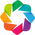

In [2]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

## Set Paths


In [3]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [4]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography/'
# Assign a path for the data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output/'

## Test Plotting

In [5]:
# create sample data
data = np.random.normal(size=[50, 2])
df = pd.DataFrame(data, columns=['col1', 'col2'])

# create holoviews graph
hv_plot = hv.Points(df)
hv_plot

:Points   [col1,col2]

# Import Data

## Open Files from Notebooks 2 & 2b

In [6]:
# Results by COMID
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')


In [7]:
# Summed catch loads by HUC12, using Method 1 from Notebook 2
huc12_load_gdf = gpd.read_parquet(
    data_output_path / 'huc12_load_gdf.parquet'
)

# Net reach loads over HUC12, using Method 2 from Notebook 2b
huc12_outlet_loads_gdf = gpd.read_parquet(
    data_output_path / 'huc12_outlet_loads_gdf.parquet'
)

# Calculate COMID % of HUC12 XSNPS & Remaining

In [8]:
columns = ['huc12', 'huc08', 'huc10',]
frac_of_huc12_df = catch_loads_gdf[columns].copy()

In [9]:
frac_of_huc12_df

,huc12,huc08,huc10
comid,,,
1748535,020401020302,02040102,0204010203
1748537,020401020302,02040102,0204010203
1748539,020401020305,02040102,0204010203
1748541,020401020302,02040102,0204010203
1748543,020401020305,02040102,0204010203
...,...,...,...
932040366,020402060103,02040206,0204020601
932040367,020402060103,02040206,0204020601
932040368,020402060103,02040206,0204020601


In [12]:
catch_load_huc12_df = catch_loads_gdf[['huc12']].join(huc12_load_gdf['tp_load'], on='huc12')
catch_load_huc12_df

,huc12,tp_load
comid,,
1748535,020401020302,2524.370516
1748537,020401020302,2524.370516
1748539,020401020305,1756.750164
1748541,020401020302,2524.370516
1748543,020401020305,1756.750164
...,...,...
932040366,020402060103,16843.861523
932040367,020402060103,16843.861523
932040368,020402060103,16843.861523


In [13]:
# Add columns with huc12 fraction
for pollutant in ['tn', 'tp', 'tss']:
    var = f'{pollutant}_load'
    catch_load_huc12_df = catch_loads_gdf[['huc12']].join(huc12_load_gdf[var], on='huc12')
    catch_loads_gdf[f'{var}_huc12_frac'] = (
        catch_loads_gdf[var]/catch_load_huc12_df[var]
    )
    

In [14]:
# confirm this adds up
HUC12_df = catch_loads_gdf.huc12=='020401020302'
x = catch_loads_gdf[HUC12_df][['huc12','tp_load', f'tp_load_huc12_frac']]
x

,huc12,tp_load,tp_load_huc12_frac
comid,,,
1748535,020401020302,1189.608231,0.471249
1748537,020401020302,363.366436,0.143943
1748541,020401020302,668.969079,0.265004
1748709,020401020302,38.967378,0.015436
1748711,020401020302,263.459392,0.104366


In [15]:
x[f'tp_load_huc12_frac'].sum()

1.0

# Distribute HUC12 net loads to Reaches

In [16]:
reach_loads_huc12_gdf = reach_concs_gdf.iloc[:,0:25].copy()

In [17]:
# Calc net pollution loads
df = reach_loads_huc12_gdf

for suffix in ['', '_ps', '_xsnps', '_rem1', '_rem2', '_rem3']:
    for pollutant in ['tn', 'tp', 'tss']:
        var = f'{pollutant}_load{suffix}'
        df[f'{var}_net'] = (
            huc12_outlet_loads_gdf[f'{var}_net']
            * catch_loads_gdf[f'{pollutant}_load_huc12_frac']
        )
# takes ? min

KeyError: 'tn_load_ps_huc12_frac'

In [18]:
huc12_outlet_loads_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 64 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   huc12_name          481 non-null    category
 1   geometry            481 non-null    geometry
 2   centroid_xy         481 non-null    object  
 3   comid               481 non-null    Int64   
 4   nord                481 non-null    Int64   
 5   to_huc12            481 non-null    category
 6   outlet_comid        481 non-null    Int64   
 7   from_huc12s         231 non-null    object  
 8   inlet_comids        231 non-null    object  
 9   outlet_comids       481 non-null    object  
 10  huc10               481 non-null    category
 11  huc08               481 non-null    category
 12  in_drb              481 non-null    boolean 
 13  catchment_hectares  481 non-null    float64 
 14  maflowv             481 non-null    float64 
 15  tn_loa